In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **Import Libraries and Packages**

In [2]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler, FunctionTransformer, OneHotEncoder, OrdinalEncoder


from sklearn import set_config
set_config(display="diagram")

#### **Import and Explore Dataset**

In [3]:
house_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housing_prices.csv')
house_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Drop relatively empty columns
house_data = house_data.drop(['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
house_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [6]:
y = house_data.pop('SalePrice')
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

#### **Prepare the data categories into numerical and categorical data**

In [7]:
X_num = house_data.select_dtypes(include='number')
X_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


In [8]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [9]:
X_cat = house_data.select_dtypes(include='object')
X_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [10]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [11]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [12]:
# Ordinal categorical data
X_cat_ord = X_cat[['GarageCond', 'GarageFinish', 'GarageQual', 'Electrical', 'HeatingQC', 'BsmtFinType2',\
                   'BsmtFinType1', 'BsmtExposure', 'KitchenQual', 'BsmtQual', 'BsmtCond', 'ExterCond', 'ExterQual', 'Functional']]

X_cat_ord

,GarageCond,GarageFinish,GarageQual,Electrical,HeatingQC,BsmtFinType2,BsmtFinType1,BsmtExposure,KitchenQual,BsmtQual,BsmtCond,ExterCond,ExterQual,Functional
0,TA,RFn,TA,SBrkr,Ex,Unf,GLQ,No,Gd,Gd,TA,TA,Gd,Typ
1,TA,RFn,TA,SBrkr,Ex,Unf,ALQ,Gd,TA,Gd,TA,TA,TA,Typ
2,TA,RFn,TA,SBrkr,Ex,Unf,GLQ,Mn,Gd,Gd,TA,TA,Gd,Typ
3,TA,Unf,TA,SBrkr,Gd,Unf,ALQ,No,Gd,TA,Gd,TA,TA,Typ
4,TA,RFn,TA,SBrkr,Ex,Unf,GLQ,Av,Gd,Gd,TA,TA,Gd,Typ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,TA,RFn,TA,SBrkr,Ex,Unf,Unf,No,TA,Gd,TA,TA,TA,Typ
1456,TA,Unf,TA,SBrkr,TA,Rec,ALQ,No,TA,Gd,TA,TA,TA,Min1
1457,TA,RFn,TA,SBrkr,Ex,Unf,GLQ,No,Gd,TA,Gd,Gd,Ex,Typ
1458,TA,Unf,TA,FuseA,Gd,Rec,GLQ,Mn,Gd,TA,TA,TA,TA,Typ


In [13]:
X_cat_onehot = X_cat.drop(['GarageCond', 'GarageFinish', 'GarageQual', 'Electrical', 'HeatingQC', \
                           'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'KitchenQual', 'BsmtQual', \
                           'BsmtCond', 'ExterCond', 'ExterQual', 'Functional'], axis=1)

X_cat_onehot

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,GarageType,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,Attchd,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,MetalSd,MetalSd,None,CBlock,GasA,Y,Attchd,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,Attchd,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Wd Sdng,Wd Shng,None,BrkTil,GasA,Y,Detchd,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,Attchd,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,VinylSd,VinylSd,None,PConc,GasA,Y,Attchd,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,Plywood,Plywood,Stone,CBlock,GasA,Y,Attchd,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,CemntBd,CmentBd,None,Stone,GasA,Y,Attchd,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,MetalSd,MetalSd,None,CBlock,GasA,Y,Attchd,Y,WD,Normal


In [14]:
X_cat_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageCond    1379 non-null   object
 1   GarageFinish  1379 non-null   object
 2   GarageQual    1379 non-null   object
 3   Electrical    1459 non-null   object
 4   HeatingQC     1460 non-null   object
 5   BsmtFinType2  1422 non-null   object
 6   BsmtFinType1  1423 non-null   object
 7   BsmtExposure  1422 non-null   object
 8   KitchenQual   1460 non-null   object
 9   BsmtQual      1423 non-null   object
 10  BsmtCond      1423 non-null   object
 11  ExterCond     1460 non-null   object
 12  ExterQual     1460 non-null   object
 13  Functional    1460 non-null   object
dtypes: object(14)
memory usage: 159.8+ KB


In [15]:
X_cat_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  Foundation     1460 non-null   object
 18  Heating        1460 non-null

##### **Adjust certain numerical features**

In [16]:
# Investigate each feature in the numerical data.
X_num['MasVnrArea'].value_counts()
# drop PoolArea, ScreenPorch, LowQualFinSF, BsmtHalfBath, EnclosedPorch, 3SsnPorch, MiscVal, Id; they have no substantial variability.
# convert all date entries and MSSubClass to one-hot categorical features.

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [17]:
X_num[X_num.MasVnrArea.isna()]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
234,60,NaN,7851,6,5,2002,2002,NaN,625,0,...,440,288,48,0,0,0,0,0,5,2010
529,20,NaN,32668,6,3,1957,1975,NaN,1219,0,...,484,0,0,200,0,0,0,0,3,2007
650,60,65.0,8125,7,6,2007,2007,NaN,0,0,...,562,0,0,0,0,0,0,0,5,2008
936,20,67.0,10083,7,5,2003,2003,NaN,833,0,...,555,0,41,0,0,0,0,0,8,2009
973,20,95.0,11639,7,5,2007,2008,NaN,0,0,...,480,0,120,0,0,0,0,0,12,2008
977,120,35.0,4274,7,5,2006,2007,NaN,1106,0,...,569,0,116,0,0,0,0,0,11,2007
1243,20,107.0,13891,10,5,2006,2006,NaN,1386,0,...,850,216,229,0,0,0,0,0,9,2006
1278,60,75.0,9473,8,5,2002,2002,NaN,804,0,...,577,0,211,0,0,0,0,0,3,2008


In [18]:
filler = int(np.round(np.median([x for x in X_num.MasVnrArea if (x != 0) & (x == x)])))

for x in list(X_num[X_num.MasVnrArea.isna()].index):
    X_num.loc[x, 'MasVnrArea'] = filler

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [19]:
X_num[X_num.MasVnrArea.isna()]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold


In [20]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [21]:
X_cat_onehot['MoSold'] = X_num.pop('MoSold')
X_cat_onehot['MoSold'] = X_cat_onehot['MoSold'].astype(str)

X_cat_onehot['YrSold'] = X_num.pop('YrSold')
X_cat_onehot['YrSold'] = X_cat_onehot['YrSold'].astype(str)

X_cat_onehot['YearBuilt'] = X_num.pop('YearBuilt')
X_cat_onehot['YearBuilt'] = X_cat_onehot['YearBuilt'].astype(str)

X_cat_onehot['YearRemodAdd'] = X_num.pop('YearRemodAdd')
X_cat_onehot['YearRemodAdd'] = X_cat_onehot['YearRemodAdd'].astype(str)

X_cat_onehot['GarageYrBlt'] = X_num.pop('GarageYrBlt')
X_cat_onehot['GarageYrBlt'] = X_cat_onehot['GarageYrBlt'].astype(str)

X_cat_onehot['MSSubClass'] = X_num.pop('MSSubClass')
X_cat_onehot['MSSubClass'] = X_cat_onehot['MSSubClass'].astype(str)

X_cat_ord['OverallQual'] = X_num.pop('OverallQual')
X_cat_ord['OverallQual'] = X_cat_ord['OverallQual'].astype(str)

X_cat_ord['OverallCond'] = X_num.pop('OverallCond')
X_cat_ord['OverallCond'] = X_cat_ord['OverallCond'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [22]:
X_cat_onehot['Date'] = X_cat_onehot['MoSold'].str[:] + X_cat_onehot['YrSold'].str[:]
X_cat_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  Foundation     1460 non-null   object
 18  Heating        1460 non-null

In [23]:
X_cat_onehot = X_cat_onehot.drop(['MoSold', 'YrSold'], axis=1)
X_cat_onehot

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,CentralAir,GarageType,PavedDrive,SaleType,SaleCondition,YearBuilt,YearRemodAdd,GarageYrBlt,MSSubClass,Date
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Y,Attchd,Y,WD,Normal,2003,2003,2003.0,60,22008
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Y,Attchd,Y,WD,Normal,1976,1976,1976.0,20,52007
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Y,Attchd,Y,WD,Normal,2001,2002,2001.0,60,92008
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Y,Detchd,Y,WD,Abnorml,1915,1970,1998.0,70,22006
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Y,Attchd,Y,WD,Normal,2000,2000,2000.0,60,122008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Y,Attchd,Y,WD,Normal,1999,2000,1999.0,60,82007
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,Y,Attchd,Y,WD,Normal,1978,1988,1978.0,20,22010
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Y,Attchd,Y,WD,Normal,1941,2006,1941.0,70,52010
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Y,Attchd,Y,WD,Normal,1950,1996,1950.0,20,42010


In [24]:
X_cat_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  Foundation     1460 non-null   object
 18  Heating        1460 non-null

In [25]:
X_cat_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageCond    1379 non-null   object
 1   GarageFinish  1379 non-null   object
 2   GarageQual    1379 non-null   object
 3   Electrical    1459 non-null   object
 4   HeatingQC     1460 non-null   object
 5   BsmtFinType2  1422 non-null   object
 6   BsmtFinType1  1423 non-null   object
 7   BsmtExposure  1422 non-null   object
 8   KitchenQual   1460 non-null   object
 9   BsmtQual      1423 non-null   object
 10  BsmtCond      1423 non-null   object
 11  ExterCond     1460 non-null   object
 12  ExterQual     1460 non-null   object
 13  Functional    1460 non-null   object
 14  OverallQual   1460 non-null   object
 15  OverallCond   1460 non-null   object
dtypes: object(16)
memory usage: 182.6+ KB


In [26]:
X = pd.concat([X_num, X_cat_ord, X_cat_onehot], axis=1)
X

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,CentralAir,GarageType,PavedDrive,SaleType,SaleCondition,YearBuilt,YearRemodAdd,GarageYrBlt,MSSubClass,Date
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,Y,Attchd,Y,WD,Normal,2003,2003,2003.0,60,22008
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,Y,Attchd,Y,WD,Normal,1976,1976,1976.0,20,52007
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,Y,Attchd,Y,WD,Normal,2001,2002,2001.0,60,92008
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,Y,Detchd,Y,WD,Abnorml,1915,1970,1998.0,70,22006
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,Y,Attchd,Y,WD,Normal,2000,2000,2000.0,60,122008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,...,Y,Attchd,Y,WD,Normal,1999,2000,1999.0,60,82007
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,...,Y,Attchd,Y,WD,Normal,1978,1988,1978.0,20,22010
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,...,Y,Attchd,Y,WD,Normal,1941,2006,1941.0,70,52010
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,...,Y,Attchd,Y,WD,Normal,1950,1996,1950.0,20,42010


#### **Split Dataset into Train and Test Set**

In [27]:
# Split dataset into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [28]:
X_train.info(), X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 955 to 1156
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    966 non-null    float64
 1   LotArea        1168 non-null   int64  
 2   MasVnrArea     1168 non-null   float64
 3   BsmtFinSF1     1168 non-null   int64  
 4   BsmtFinSF2     1168 non-null   int64  
 5   BsmtUnfSF      1168 non-null   int64  
 6   TotalBsmtSF    1168 non-null   int64  
 7   1stFlrSF       1168 non-null   int64  
 8   2ndFlrSF       1168 non-null   int64  
 9   LowQualFinSF   1168 non-null   int64  
 10  GrLivArea      1168 non-null   int64  
 11  BsmtFullBath   1168 non-null   int64  
 12  BsmtHalfBath   1168 non-null   int64  
 13  FullBath       1168 non-null   int64  
 14  HalfBath       1168 non-null   int64  
 15  BedroomAbvGr   1168 non-null   int64  
 16  KitchenAbvGr   1168 non-null   int64  
 17  TotRmsAbvGrd   1168 non-null   int64  
 18  Firepl

(None, None)

In [29]:
X_num = X_train.select_dtypes(exclude='object')
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 955 to 1156
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    966 non-null    float64
 1   LotArea        1168 non-null   int64  
 2   MasVnrArea     1168 non-null   float64
 3   BsmtFinSF1     1168 non-null   int64  
 4   BsmtFinSF2     1168 non-null   int64  
 5   BsmtUnfSF      1168 non-null   int64  
 6   TotalBsmtSF    1168 non-null   int64  
 7   1stFlrSF       1168 non-null   int64  
 8   2ndFlrSF       1168 non-null   int64  
 9   LowQualFinSF   1168 non-null   int64  
 10  GrLivArea      1168 non-null   int64  
 11  BsmtFullBath   1168 non-null   int64  
 12  BsmtHalfBath   1168 non-null   int64  
 13  FullBath       1168 non-null   int64  
 14  HalfBath       1168 non-null   int64  
 15  BedroomAbvGr   1168 non-null   int64  
 16  KitchenAbvGr   1168 non-null   int64  
 17  TotRmsAbvGrd   1168 non-null   int64  
 18  Firepl

In [30]:
# Ordinal categorical data
X_cat_ord = X_train[['GarageCond', 'GarageFinish', 'GarageQual', 'Electrical', 'HeatingQC', 'BsmtFinType2','BsmtFinType1', \
                     'BsmtExposure', 'KitchenQual', 'BsmtQual', 'BsmtCond', 'ExterCond', 'ExterQual', 'Functional', 'OverallQual', 'OverallCond']]

X_cat_ord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 955 to 1156
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageCond    1103 non-null   object
 1   GarageFinish  1103 non-null   object
 2   GarageQual    1103 non-null   object
 3   Electrical    1168 non-null   object
 4   HeatingQC     1168 non-null   object
 5   BsmtFinType2  1139 non-null   object
 6   BsmtFinType1  1139 non-null   object
 7   BsmtExposure  1139 non-null   object
 8   KitchenQual   1168 non-null   object
 9   BsmtQual      1139 non-null   object
 10  BsmtCond      1139 non-null   object
 11  ExterCond     1168 non-null   object
 12  ExterQual     1168 non-null   object
 13  Functional    1168 non-null   object
 14  OverallQual   1168 non-null   object
 15  OverallCond   1168 non-null   object
dtypes: object(16)
memory usage: 155.1+ KB


In [31]:
X_cat_onehot = X_train.drop(X_num.columns.tolist() + X_cat_ord.columns.tolist(), axis=1)

X_cat_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 955 to 1156
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1168 non-null   object
 1   Street         1168 non-null   object
 2   LotShape       1168 non-null   object
 3   LandContour    1168 non-null   object
 4   Utilities      1168 non-null   object
 5   LotConfig      1168 non-null   object
 6   LandSlope      1168 non-null   object
 7   Neighborhood   1168 non-null   object
 8   Condition1     1168 non-null   object
 9   Condition2     1168 non-null   object
 10  BldgType       1168 non-null   object
 11  HouseStyle     1168 non-null   object
 12  RoofStyle      1168 non-null   object
 13  RoofMatl       1168 non-null   object
 14  Exterior1st    1168 non-null   object
 15  Exterior2nd    1168 non-null   object
 16  MasVnrType     1162 non-null   object
 17  Foundation     1168 non-null   object
 18  Heating        1168 non-nu

##### **Explore the OneHot dataset for columns with unknown categories**

In [32]:
X_cat_ord.GarageCond.value_counts()

TA    1058
Fa      28
Gd       8
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [33]:
X_test.GarageCond.value_counts()

TA    268
Fa      7
Gd      1
Name: GarageCond, dtype: int64

In [34]:
set(X_test.YearBuilt.unique()) - set(X_cat_onehot.YearBuilt.unique())

{'1911', '1917'}

In [35]:
X_cat_onehot[X_cat_onehot.YearBuilt == 1]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,CentralAir,GarageType,PavedDrive,SaleType,SaleCondition,YearBuilt,YearRemodAdd,GarageYrBlt,MSSubClass,Date


In [36]:
X_test[X_test.YearBuilt == '1917']

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,CentralAir,GarageType,PavedDrive,SaleType,SaleCondition,YearBuilt,YearRemodAdd,GarageYrBlt,MSSubClass,Date
1248,60.0,9600,0.0,319,0,416,735,1134,924,0,...,N,Detchd,P,WD,Normal,1917,1950,1950.0,75,42008


In [37]:
X_test.loc[944, 'Utilities'] = 'AllPub'
X_test.loc[595, 'Exterior2nd'] = 'Brk Cmn'
X_test.loc[1270, 'RoofStyle'] = 'Mansard'

X_cat_onehot.loc[956, 'Neighborhood'] = 'NPkVill'
X_cat_onehot.loc[599, 'Neighborhood'] = 'NPkVill'
X_cat_onehot.loc[1230, 'RoofStyle'] = 'Mansard'
X_cat_onehot.loc[1011, 'Exterior1st'] = 'Stone'
X_cat_onehot.loc[1187, 'Exterior1st'] = 'Stone'
X_cat_onehot.loc[1370, 'Exterior1st'] = 'BrkComm'
X_cat_onehot.loc[1370, 'Exterior2nd'] = 'AsphShn'
X_cat_onehot.loc[1321, 'Heating'] = 'OthW'
X_cat_onehot.loc[762, 'SaleType'] = 'CWD'
X_cat_onehot.loc[326, 'SaleType'] = 'CWD'



X_cat_onehot = X_cat_onehot.drop(['Condition2','RoofMatl', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'Date'], axis=1)
X_test = X_test.drop(['Condition2', 'RoofMatl', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'Date'], axis=1)


In [38]:
df = X_cat_onehot.Condition1.value_counts().reset_index()
df = df.assign(percent = df.Condition1/sum(df.Condition1))
df = df.assign(SQR = (df.percent)**2)
df

,index,Condition1,percent,SQR
0,Norm,1006,0.861301,0.741840
1,Feedr,65,0.055651,0.003097
2,Artery,39,0.033390,0.001115
3,RRAn,23,0.019692,0.000388
4,PosN,12,0.010274,0.000106
5,RRAe,11,0.009418,0.000089
6,PosA,8,0.006849,0.000047
7,RRNn,4,0.003425,0.000012


In [39]:
df.SQR.sum()

0.7466926252580219

In [40]:
X_train = pd.concat([X_num, X_cat_ord, X_cat_onehot], axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 955 to 1156
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    966 non-null    float64
 1   LotArea        1168 non-null   int64  
 2   MasVnrArea     1168 non-null   float64
 3   BsmtFinSF1     1168 non-null   int64  
 4   BsmtFinSF2     1168 non-null   int64  
 5   BsmtUnfSF      1168 non-null   int64  
 6   TotalBsmtSF    1168 non-null   int64  
 7   1stFlrSF       1168 non-null   int64  
 8   2ndFlrSF       1168 non-null   int64  
 9   LowQualFinSF   1168 non-null   int64  
 10  GrLivArea      1168 non-null   int64  
 11  BsmtFullBath   1168 non-null   int64  
 12  BsmtHalfBath   1168 non-null   int64  
 13  FullBath       1168 non-null   int64  
 14  HalfBath       1168 non-null   int64  
 15  BedroomAbvGr   1168 non-null   int64  
 16  KitchenAbvGr   1168 non-null   int64  
 17  TotRmsAbvGrd   1168 non-null   int64  
 18  Firepl

#### **Feature Selection**

##### **Variance**

In [41]:
def variance_selector(A, m):

  if type(A) == pd.core.frame.DataFrame:
    X_num_scaled = pd.DataFrame(RobustScaler().fit_transform(A))
    X_num_scaled.columns = A.columns
    X_num_scaled
    B = A.copy()

  if type(A) == np.ndarray:
    X_num_scaled = pd.DataFrame(RobustScaler().fit_transform(A))
    X_num_scaled.columns = X_num.columns
    X_num_scaled
    B = pd.DataFrame(A, columns=X_num.columns)

  var_selector = VarianceThreshold(threshold=m)
  var_selector.fit_transform(X_num_scaled)
  chosen_cols = X_num_scaled.columns[var_selector.get_support(indices=True)]
  chosen_cols
    
  return B[chosen_cols]

In [42]:
drop_col = list(set(X_num.columns) - set(variance_selector(X_num, 0).columns))
drop_col

[]

In [43]:
X_num = X_num[variance_selector(X_num, 0).columns]
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 955 to 1156
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    966 non-null    float64
 1   LotArea        1168 non-null   int64  
 2   MasVnrArea     1168 non-null   float64
 3   BsmtFinSF1     1168 non-null   int64  
 4   BsmtFinSF2     1168 non-null   int64  
 5   BsmtUnfSF      1168 non-null   int64  
 6   TotalBsmtSF    1168 non-null   int64  
 7   1stFlrSF       1168 non-null   int64  
 8   2ndFlrSF       1168 non-null   int64  
 9   LowQualFinSF   1168 non-null   int64  
 10  GrLivArea      1168 non-null   int64  
 11  BsmtFullBath   1168 non-null   int64  
 12  BsmtHalfBath   1168 non-null   int64  
 13  FullBath       1168 non-null   int64  
 14  HalfBath       1168 non-null   int64  
 15  BedroomAbvGr   1168 non-null   int64  
 16  KitchenAbvGr   1168 non-null   int64  
 17  TotRmsAbvGrd   1168 non-null   int64  
 18  Firepl

In [44]:
X_train = X_train.drop(drop_col, axis=1)
X_test = X_test.drop(drop_col, axis=1)

##### **Collinearity**

In [45]:
X_num.corr()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
LotFrontage,1.000000,0.415790,0.169964,0.220174,0.047306,0.133501,0.379404,0.445758,0.074593,0.040683,...,0.270096,0.263397,0.326480,0.049088,0.157544,0.023104,0.081694,0.042578,0.220150,0.007831
LotArea,0.415790,1.000000,0.077143,0.240962,0.121637,-0.010803,0.284418,0.315147,0.038892,0.010543,...,0.273779,0.156831,0.191106,0.206839,0.088336,-0.023255,0.013542,0.055933,0.098260,0.034228
MasVnrArea,0.169964,0.077143,1.000000,0.263667,-0.089930,0.121191,0.361917,0.334928,0.179267,-0.068224,...,0.251675,0.365221,0.374885,0.171635,0.118757,-0.114192,0.032016,0.034128,0.024381,-0.031913
BsmtFinSF1,0.220174,0.240962,0.263667,1.000000,-0.054210,-0.486784,0.524851,0.451436,-0.139281,-0.056134,...,0.267946,0.195078,0.285197,0.191426,0.116421,-0.088129,0.022878,0.075194,0.136913,0.010815
BsmtFinSF2,0.047306,0.121637,-0.089930,-0.054210,1.000000,-0.228473,0.087834,0.081608,-0.079807,0.030578,...,0.033278,-0.032859,-0.018976,0.040238,0.020225,0.026331,-0.028577,0.099110,0.028465,0.007864
BsmtUnfSF,0.133501,-0.010803,0.121191,-0.486784,-0.228473,1.000000,0.419189,0.321274,-0.005673,0.007751,...,0.054442,0.219150,0.182307,-0.010800,0.127097,-0.009581,0.018559,-0.017176,-0.020280,-0.019238
TotalBsmtSF,0.379404,0.284418,0.361917,0.524851,0.087834,0.419189,1.000000,0.822746,-0.179986,-0.038904,...,0.345137,0.411077,0.472500,0.202583,0.256527,-0.091151,0.031739,0.097731,0.132102,-0.005261
1stFlrSF,0.445758,0.315147,0.334928,0.451436,0.081608,0.321274,0.822746,1.000000,-0.204568,-0.018838,...,0.413164,0.419283,0.476216,0.218821,0.217292,-0.062385,0.039964,0.099185,0.129710,-0.010572
2ndFlrSF,0.074593,0.038892,0.179267,-0.139281,-0.079807,-0.005673,-0.179986,-0.204568,1.000000,0.063207,...,0.186174,0.207059,0.157783,0.107713,0.211753,0.043716,-0.016983,0.051412,0.070548,0.012847
LowQualFinSF,0.040683,0.010543,-0.068224,-0.056134,0.030578,0.007751,-0.038904,-0.018838,0.063207,1.000000,...,-0.008966,-0.055001,-0.028533,-0.009636,0.023829,0.051083,0.001318,0.045547,0.092264,-0.005451


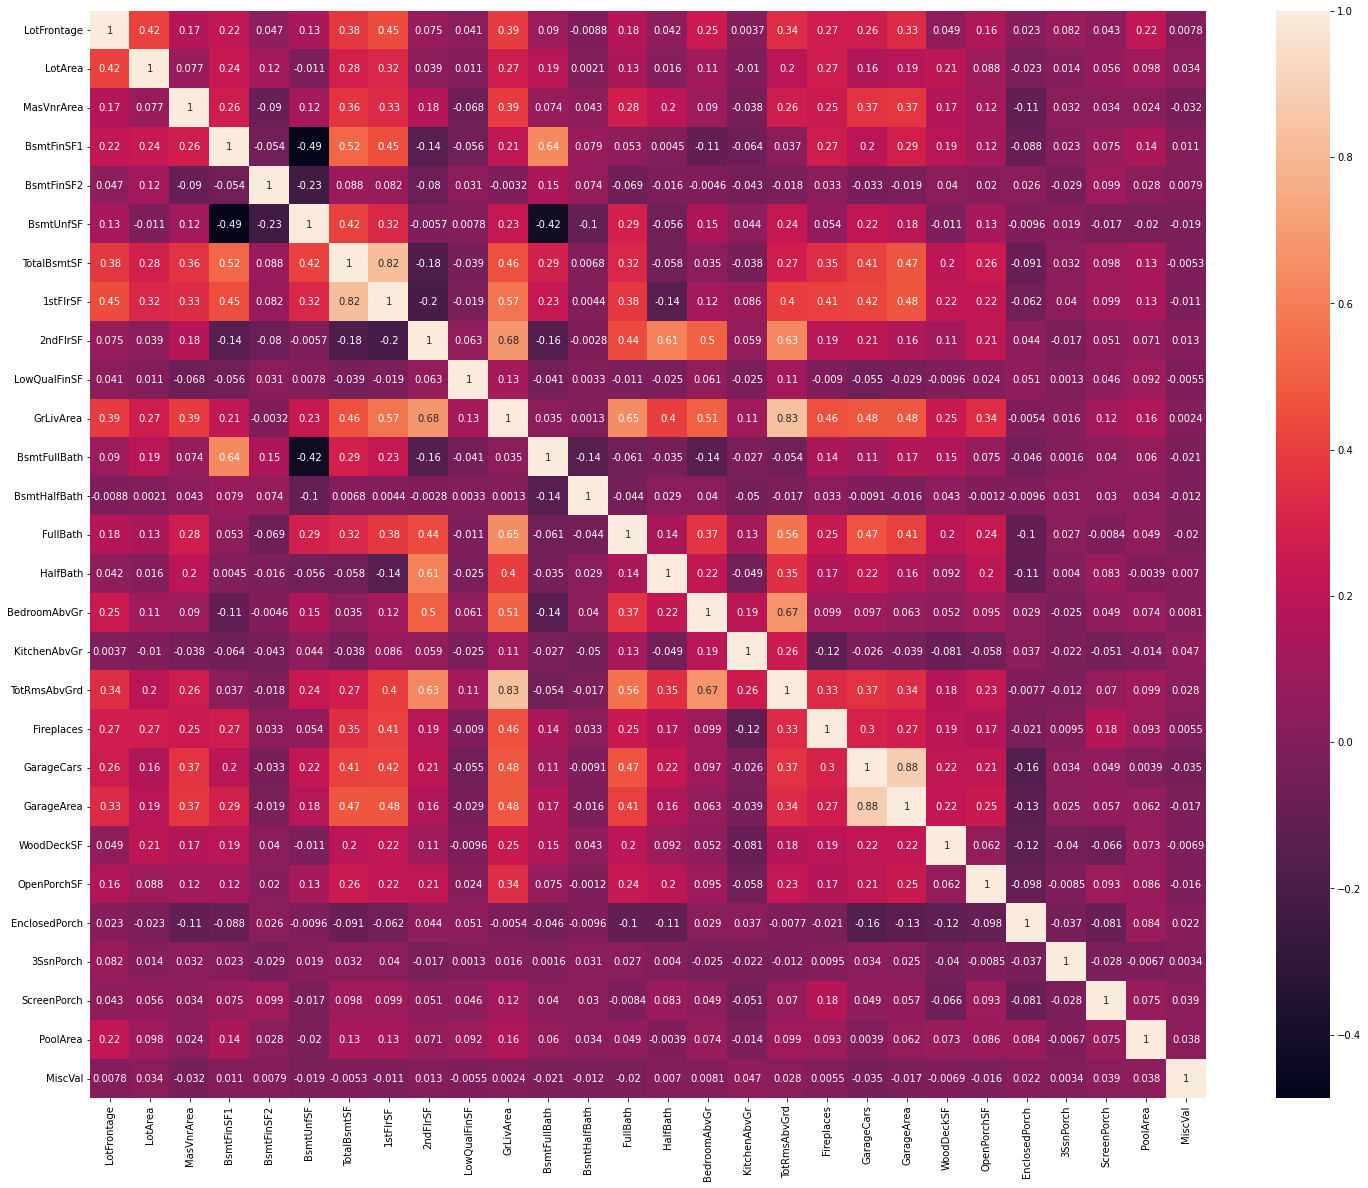

In [46]:
fig, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(X_num.corr(), annot=True)
plt.show;

In [47]:
corr = X_num.corr()
corr_values = corr.unstack()
corr_values = corr_values.loc[corr_values != 1]
corr_values.sort_values(ascending=False).head(10)

GarageArea    GarageCars      0.881687
GarageCars    GarageArea      0.881687
GrLivArea     TotRmsAbvGrd    0.828413
TotRmsAbvGrd  GrLivArea       0.828413
1stFlrSF      TotalBsmtSF     0.822746
TotalBsmtSF   1stFlrSF        0.822746
2ndFlrSF      GrLivArea       0.684751
GrLivArea     2ndFlrSF        0.684751
BedroomAbvGr  TotRmsAbvGrd    0.670609
TotRmsAbvGrd  BedroomAbvGr    0.670609
dtype: float64

In [48]:
def collinearity_selector(X, n):
    
    if type(X) == pd.core.frame.DataFrame:
      X_n = X.copy()

    if type(X) == np.ndarray:
      X_n = pd.DataFrame(X, columns=X_num.columns)
    
    corr_matrix = X_n.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > n)]
    
    return X_n.drop(to_drop, axis=1)

In [49]:
drop_cols = list(set(X_num.columns) - set(collinearity_selector(X_num, 0.9).columns))
drop_cols

[]

In [50]:
X_num = collinearity_selector(X_num, 0.9)
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 955 to 1156
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    966 non-null    float64
 1   LotArea        1168 non-null   int64  
 2   MasVnrArea     1168 non-null   float64
 3   BsmtFinSF1     1168 non-null   int64  
 4   BsmtFinSF2     1168 non-null   int64  
 5   BsmtUnfSF      1168 non-null   int64  
 6   TotalBsmtSF    1168 non-null   int64  
 7   1stFlrSF       1168 non-null   int64  
 8   2ndFlrSF       1168 non-null   int64  
 9   LowQualFinSF   1168 non-null   int64  
 10  GrLivArea      1168 non-null   int64  
 11  BsmtFullBath   1168 non-null   int64  
 12  BsmtHalfBath   1168 non-null   int64  
 13  FullBath       1168 non-null   int64  
 14  HalfBath       1168 non-null   int64  
 15  BedroomAbvGr   1168 non-null   int64  
 16  KitchenAbvGr   1168 non-null   int64  
 17  TotRmsAbvGrd   1168 non-null   int64  
 18  Firepl

In [51]:
X_train = X_train.drop(drop_cols, axis=1)
X_test = X_test.drop(drop_cols, axis=1)

In [52]:
X_train.info(), X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 955 to 1156
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    966 non-null    float64
 1   LotArea        1168 non-null   int64  
 2   MasVnrArea     1168 non-null   float64
 3   BsmtFinSF1     1168 non-null   int64  
 4   BsmtFinSF2     1168 non-null   int64  
 5   BsmtUnfSF      1168 non-null   int64  
 6   TotalBsmtSF    1168 non-null   int64  
 7   1stFlrSF       1168 non-null   int64  
 8   2ndFlrSF       1168 non-null   int64  
 9   LowQualFinSF   1168 non-null   int64  
 10  GrLivArea      1168 non-null   int64  
 11  BsmtFullBath   1168 non-null   int64  
 12  BsmtHalfBath   1168 non-null   int64  
 13  FullBath       1168 non-null   int64  
 14  HalfBath       1168 non-null   int64  
 15  BedroomAbvGr   1168 non-null   int64  
 16  KitchenAbvGr   1168 non-null   int64  
 17  TotRmsAbvGrd   1168 non-null   int64  
 18  Firepl

(None, None)

In [53]:
X_test[X_test.Electrical.isna()]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,GarageType,PavedDrive,SaleType,SaleCondition,MSSubClass
1379,73.0,9735,0.0,0,0,384,384,754,640,0,...,VinylSd,None,PConc,GasA,Y,BuiltIn,Y,WD,Normal,80


In [54]:
X_test.Electrical.value_counts()

SBrkr    265
FuseA     18
FuseF      7
FuseP      1
Name: Electrical, dtype: int64

In [55]:
X_test.loc[1379, 'Electrical'] = 'FuseP'

In [56]:
X_test[X_test.Electrical.isna()]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,GarageType,PavedDrive,SaleType,SaleCondition,MSSubClass


##### **Correlation Plot**

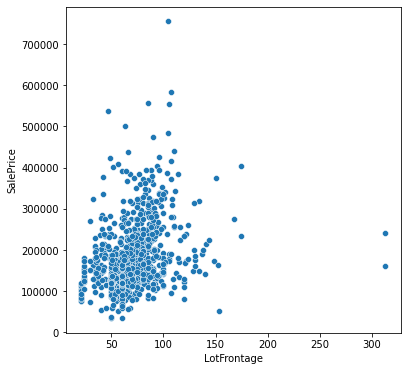

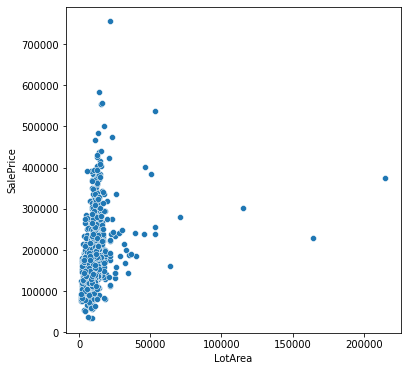

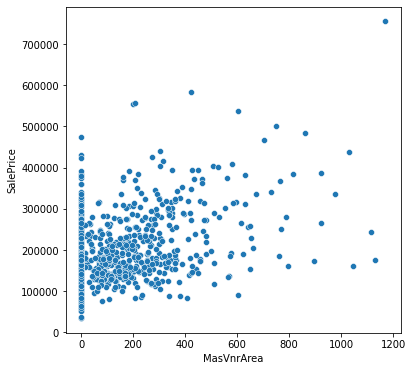

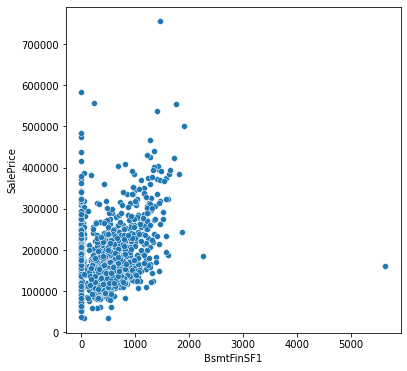

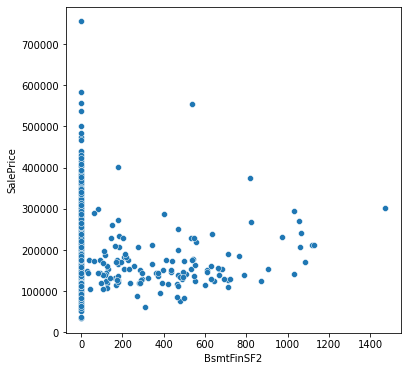

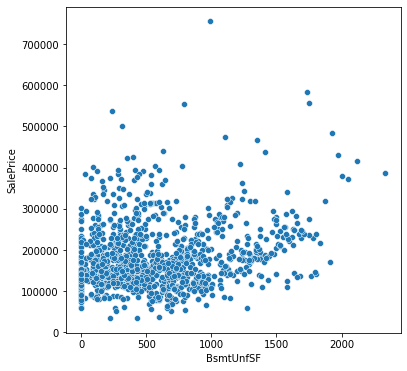

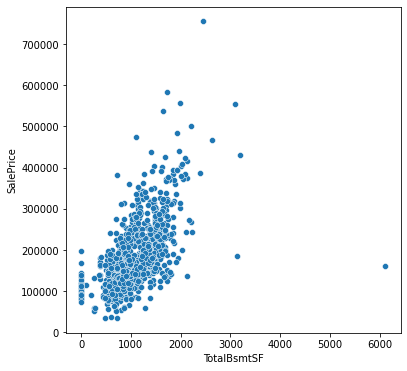

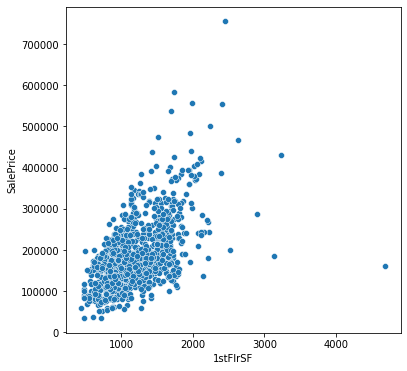

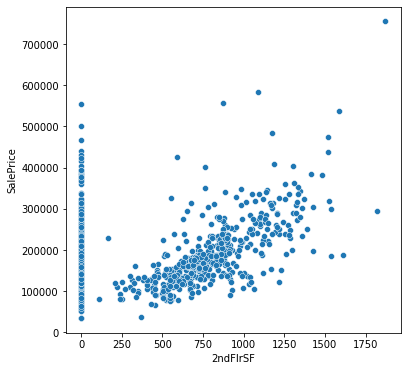

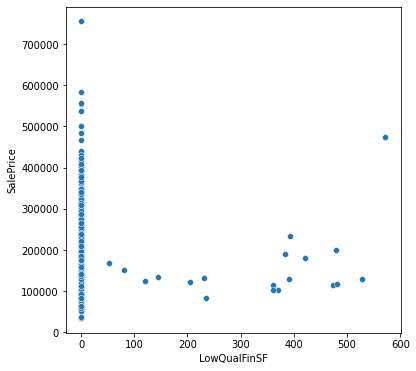

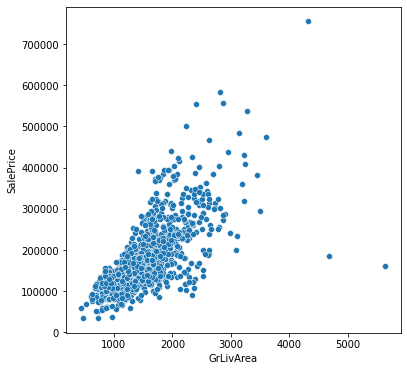

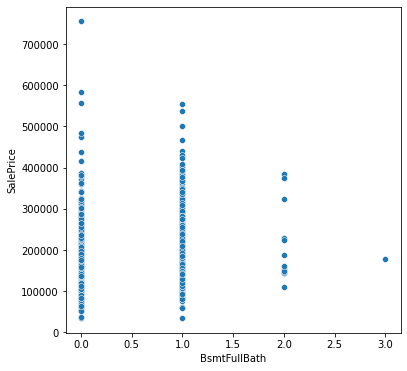

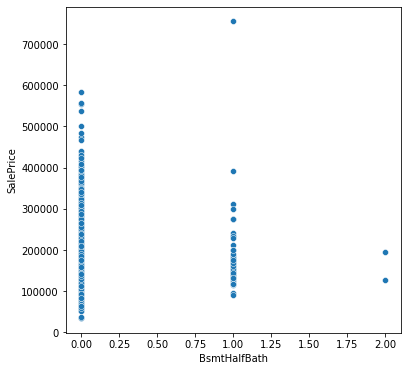

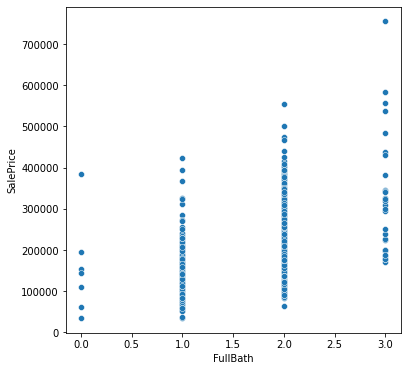

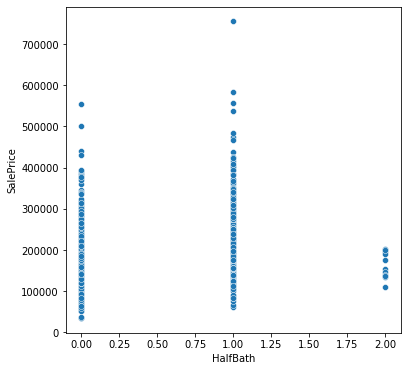

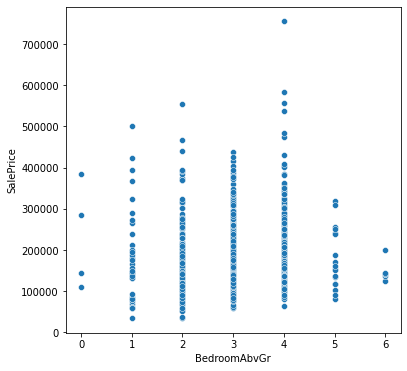

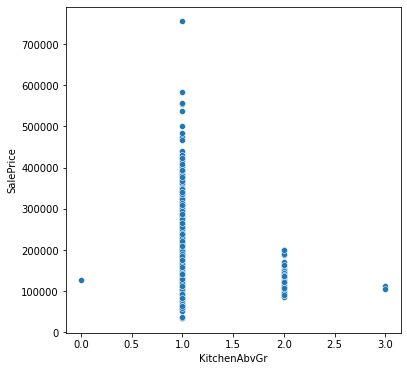

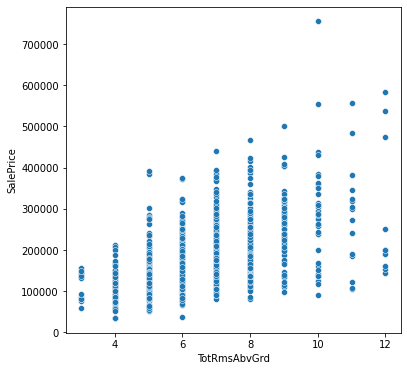

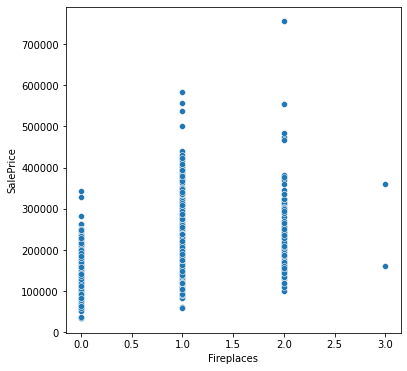

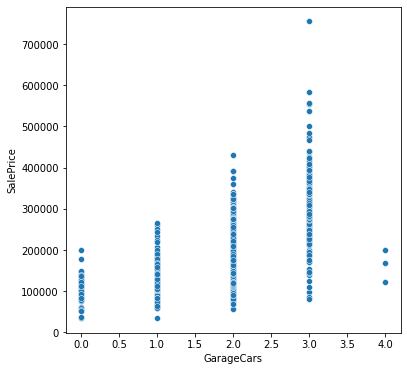

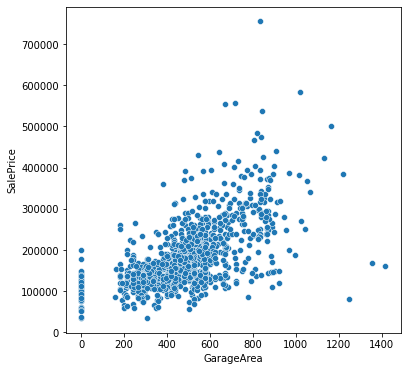

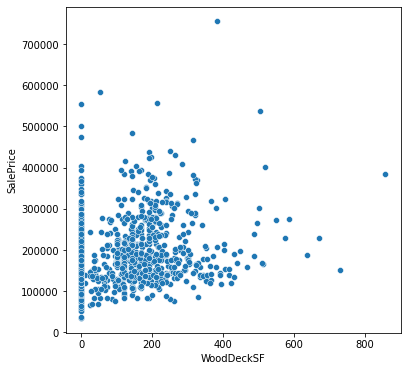

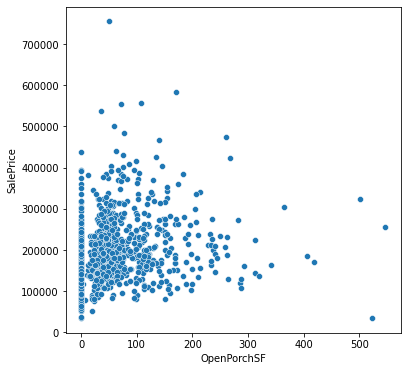

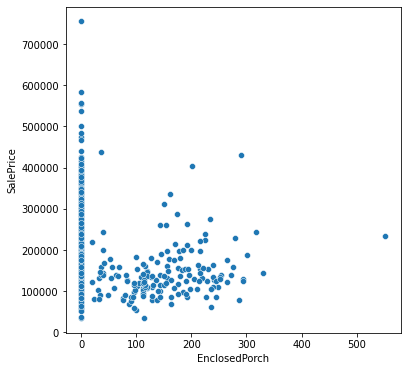

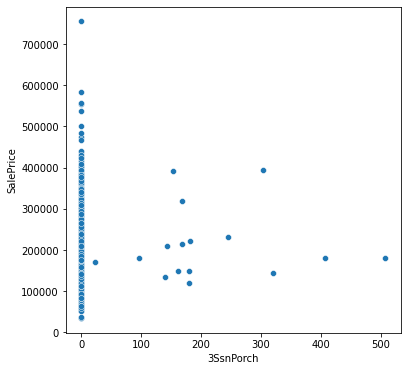

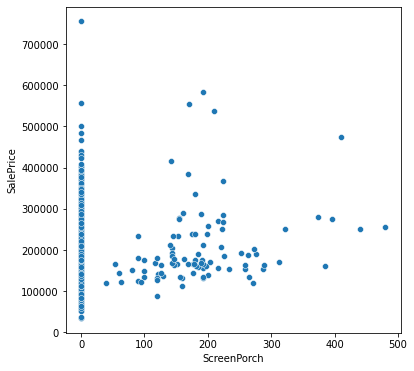

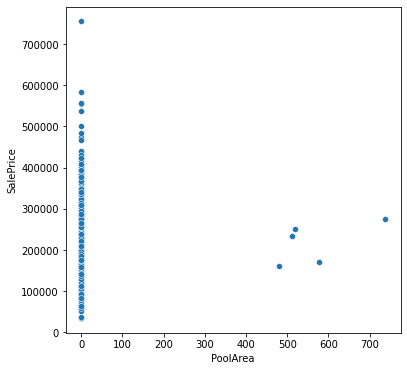

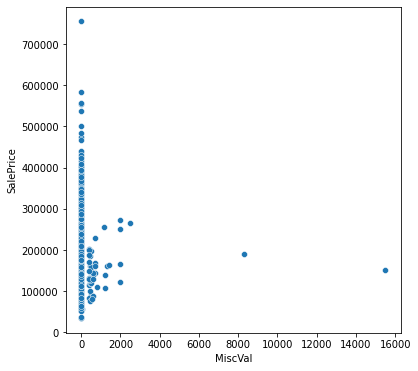

In [57]:
for num in range(0, len(X_num.columns)):
    # data = X_num.iloc[:, num:num+4]
    # for numb in range(0, len(data.columns)):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=X_num.iloc[:, num], y=y)
    plt.show();

#### **Build Pipeline with Different Models**

In [64]:
numeric_pipeline = make_pipeline(SimpleImputer(),
                                 SelectKBest(score_func=f_regression), 
                                 PCA()
                                 )


categ_a = ['N_A', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_b = ['N_A', 'NA', 'Unf', 'RFn', 'Fin']
categ_c = ['N_A', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_d = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']
categ_e = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_f = ['N_A', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
categ_g = ['N_A', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
categ_h = ['N_A', 'NA', 'No', 'Mn', 'Av', 'Gd']
categ_i = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_j = ['N_A', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_k = ['N_A', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_l = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_m = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_n = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
categ_o = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
categ_p = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']


cat_ord_categ = [categ_a, categ_b, categ_c, categ_d, categ_e, categ_f, categ_g, categ_h, \
                 categ_i, categ_j, categ_k, categ_l, categ_m, categ_n, categ_o, categ_p]

cat_ordinal_pipeline = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"), \
                                     OrdinalEncoder(categories=cat_ord_categ))
     

cat_onehot_pipeline = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),\
                                    OneHotEncoder(drop='first', handle_unknown="ignore"), \
                                    TruncatedSVD()
                                    )
         
        

preprocessor = ColumnTransformer(transformers=[('num_pipe', numeric_pipeline, X_num.columns),
                                               ('cat_onehot', cat_onehot_pipeline, X_cat_onehot.columns),
                                               ('cat_ord', cat_ordinal_pipeline, X_cat_ord.columns)
                                              ]
                                )
        

columntransformer_param = {'columntransformer__num_pipe__simpleimputer__strategy': ['mean', 'median'],
                           'columntransformer__num_pipe__selectkbest__k': range(25, 27),
                           'columntransformer__num_pipe__pca__n_components': range(23, 26),
                           'columntransformer__cat_onehot__truncatedsvd__n_components': range(128, 130),
                           'columntransformer__cat_onehot__truncatedsvd__random_state': [25]
                          }

param = {'RandomForestRegressor()': {**columntransformer_param,
                                     'randomforestregressor__n_estimators': range(7, 10),
                                     'randomforestregressor__criterion': ['squared_error'],
                                     'randomforestregressor__max_depth': range(5, 8),
                                     'randomforestregressor__min_samples_split': range(2, 5),
                                     'randomforestregressor__min_samples_leaf': range(1, 3),
                                     'randomforestregressor__random_state': [25],
                                     'randomforestregressor__max_features': [None],
                                     'randomforestregressor__bootstrap': [True],
                                     'randomforestregressor__max_samples': [None]
                                     }
         }


Results = {'RandomForestRegressor()': []}


for model in [RandomForestRegressor()]:
    
    fullpipeline = make_pipeline(preprocessor, model)

    search = GridSearchCV(fullpipeline, param[f'{model}'], cv=5, verbose=1)
    search.fit(X_train, y_train)

    y_pred_train = search.predict(X_train)
    y_pred_test = search.predict(X_test)

    Results[f'{model}'].append(search.best_score_)
    Results[f'{model}'].append(search.best_params_)

    Results[f'{model}'].append(y_pred_train)
    Results[f'{model}'].append(y_pred_test)

    Results[f'{model}'].append(mean_squared_error(y_train, y_pred_train))
    Results[f'{model}'].append(mean_squared_error(y_train, y_pred_train)**0.5)
    Results[f'{model}'].append(mean_absolute_error(y_train, y_pred_train))
    Results[f'{model}'].append(r2_score(y_train, y_pred_train))

    Results[f'{model}'].append(mean_squared_error(y_test, y_pred_test))
    Results[f'{model}'].append(mean_squared_error(y_test, y_pred_test)**0.5)
    Results[f'{model}'].append(mean_absolute_error(y_test, y_pred_test))
    Results[f'{model}'].append(r2_score(y_test, y_pred_test))

    #pickle.dump(search, open(file=f'/content/drive/MyDrive/Colab Notebooks/model_{model}.sav', mode='wb'))


Comparator_result = pd.DataFrame(Results, index=['best_score', 'best_param', \
                                                 'y_pred_train', 'y_pred_test', \
                                                 'MSE_train', 'RMSE_train', \
                                                 'MAE_train', 'R_sqr_train', \
                                                 'MSE_test', 'RMSE_test', \
                                                 'MAE_test', 'R_sqr_test']
                                )

Comparator_result

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


,RandomForestRegressor()
best_score,0.778325
best_param,{'columntransformer__cat_onehot__truncatedsvd_...
y_pred_train,"[163452.40290019035, 240123.70992659326, 20717..."
y_pred_test,"[323869.56097624236, 294142.32468239893, 16320..."
MSE_train,369506217.441482
RMSE_train,19222.54451
MAE_train,13356.004329
R_sqr_train,0.937706
MSE_test,1372243377.685701
RMSE_test,37043.803499


In [65]:
Comparator_result[Comparator_result.index == 'best_param']['RandomForestRegressor()'].to_list()

[{'columntransformer__cat_onehot__truncatedsvd__n_components': 128,
  'columntransformer__cat_onehot__truncatedsvd__random_state': 25,
  'columntransformer__num_pipe__pca__n_components': 23,
  'columntransformer__num_pipe__selectkbest__k': 26,
  'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
  'randomforestregressor__bootstrap': True,
  'randomforestregressor__criterion': 'squared_error',
  'randomforestregressor__max_depth': 7,
  'randomforestregressor__max_features': None,
  'randomforestregressor__max_samples': None,
  'randomforestregressor__min_samples_leaf': 1,
  'randomforestregressor__min_samples_split': 4,
  'randomforestregressor__n_estimators': 9,
  'randomforestregressor__random_state': 25}]

In [66]:
y_train, y_test

(955     145000
 1278    237000
 667     193500
 543     133000
 1035     84000
          ...  
 1341    155000
 143     204000
 474     251000
 318     260000
 1156    179900
 Name: SalePrice, Length: 1168, dtype: int64, 932     320000
 409     339750
 1271    185750
 270     266000
 1290    180500
          ...  
 260     176000
 138     230000
 586     130000
 1346    262500
 1384    105000
 Name: SalePrice, Length: 292, dtype: int64)

In [67]:
pickle.dump(search, open(file=f'/content/drive/MyDrive/Colab Notebooks/model_RandomForest.sav', mode='wb'))